In [2]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt


import matplotlib

In [10]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


# noiseless

In [11]:
time = np.arange(0, 20, 0.1);
amplitude = np.sin(time) 
time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'

time_serie_lagged=noisy_time_serie.shift(20)


s1=time_serie['amplitude'].dropna().interpolate().values
s2=time_serie_lagged['amplitude'].dropna().interpolate().values

print(s1.shape)
print(s2.shape)

(200,)
(180,)


In [12]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = s1
d2 = s2

min_length = min(len(d1), len(d2))
d1 = d1[:min_length]
d2 = d2[:min_length]

y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

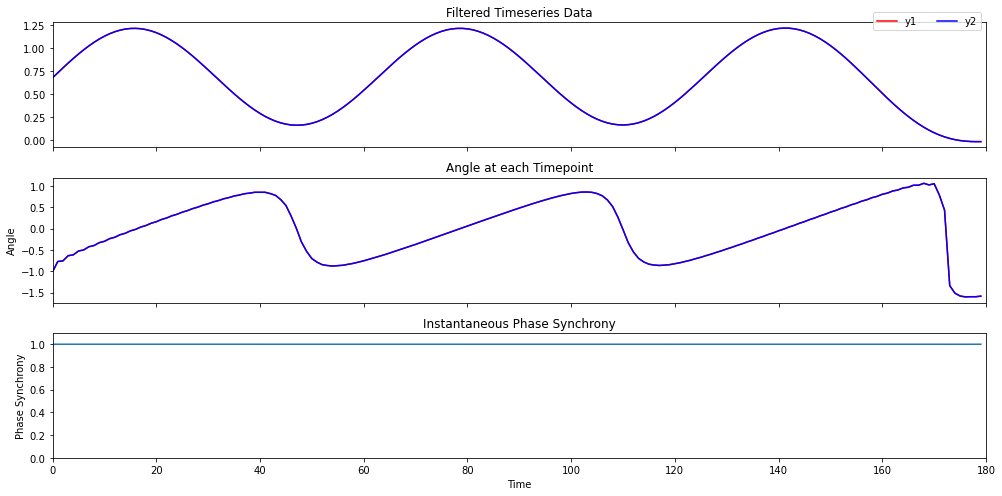

In [13]:
# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

## with  noise

In [6]:
time = np.arange(0, 20, 0.1);
amplitude = np.sin(time) 
time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'


noise = np.random.normal(loc=0, scale=0.0001, size=time_serie.shape)

noisy_time_serie= time_serie + noise

noisy_time_serie_lagged=noisy_time_serie.shift(20)+ np.random.normal(loc=0, scale=0.01, size=time_serie.shape)





s1=noisy_time_serie['amplitude'].dropna().interpolate().values
s2=noisy_time_serie_lagged['amplitude'].dropna().interpolate().values

print(s1.shape)
print(s2.shape)

(200,)
(180,)


In [8]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = s1
d2 = s2

min_length = min(len(d1), len(d2))
d1 = d1[:min_length]
d2 = d2[:min_length]

y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

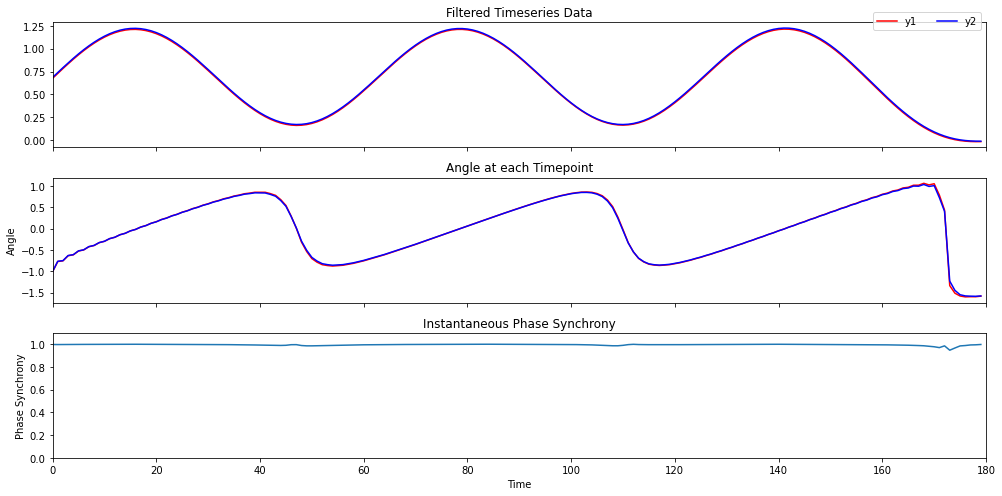

In [9]:
# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()